# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
print(heroes_df.shape)
print(heroes_df.info())
print('\n')
str_cols = list(heroes_df.columns)
str_cols.remove('Height')
str_cols.remove('Weight')

for column in str_cols:
    print(str(column))
    print(len(heroes_df[str(column)].unique()))
    print(heroes_df[str(column)].value_counts(normalize=True)[:5])
    print('\n')

print(heroes_df.describe())
print('\n')
num_cols = ['Height', 'Weight']
for column in num_cols:
    print(str(column))
    print(len(heroes_df[str(column)].unique()))
    print(heroes_df[str(column)].value_counts(normalize=True).head())
    print('\n')

(734, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None


name
715
Spider-Man        0.004087
Goliath           0.004087
Batman            0.002725
Captain Marvel    0.002725
Atom              0.002725
Name: name, dtype: float64


Gender
3
Male      0.688011
Female    0.272480
-         0.039510
Name: Gender, dtype: float64


Eye color
23
blue     0.306540
-        0.234332
brown    0.171662
green    0.099455
red      0.062670
Name: Eye color, dtype: float64


Race
62
-                0.414169
Human            0.283379
Mutant          

In [6]:
print(powers_df.shape)
powers_df.info()
print('\n')
print(powers_df.dtypes.value_counts())
powers_df.isna().max().sum()
# There doesn't appear to be missing any data for this DF. 
# Except for hero_names, It seems to be entirely boolean data.

(667, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


bool      167
object      1
dtype: int64


0

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [7]:
# 1. Look for duplicate entries. Are any disposable?
# 2. Check out placeholder entries ('-') for categorical data: 
#         Gender, Eye color, Race, Hair color, Publisher, Alignment.
#         Probably drop Skin color. 90% of data absent.
#         I lean toward creating a new category for these missing data. 
# 3. Investigate Height and Weight a little more, but probably fill missing values (-99) 
#         with median for weight (more evenly distributed, I think) and possibly mode for height
#         (a whopping 8% of entries are exactly 183 cm tall).

In [8]:
# First, inspecting to see if there are any repeated heroes.
print(len(heroes_df) - len(heroes_df.name.unique()))
duplicates = heroes_df.loc[heroes_df['name'].duplicated()]['name'].unique()
heroes_df.loc[heroes_df['name'].isin(duplicates)]

19


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [9]:
# Getting rid of duplicates with mostly placeholder values
heroes_df.drop_duplicates(subset='name', inplace=True)
heroes_df.reset_index(drop=True, inplace=True)

In [10]:
#Exploration of entries with placeholder gender. Are they aliens? Gods?
heroes_df.loc[heroes_df['Gender'] == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
82,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
106,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
125,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
126,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
151,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
156,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0
169,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
187,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0
195,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
225,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0


In [11]:
# A couple are gods, one monster (Kaiju). Some are rather gendered in name though 
# (e.g., "Spider-Man", "Shadow King", "Machine Man", "Franklin Storm", "Fabian Cortez", "Cecilia Reyes").
# "Unknown" might be a better category. "Unconfirmed"? That seems lewd, but maybe most accurate,
# as most of the unmarked ones have an aura of mystery/uncertainty around their identity.
heroes_df.loc[heroes_df['Gender']=='-', 'Gender'] = "Unconfirmed"
heroes_df['Gender'].value_counts()

# Also removed a couple more rows with mostly missing data.
heroes_df.drop([82, 151, 169, 295, 225, 251, 270, 276, 398, 489, 495, 497], axis=0, inplace=True)
heroes_df.reset_index(drop=True, inplace=True)

# Random: Godzilla was way taller than 108 cm.

In [12]:
# I also notice that Godzilla has publisher "NaN". I think I want to change that to "Uncategorized".
# I'll just check those out first.
heroes_df.loc[heroes_df['Publisher'].isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
45,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
81,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
129,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
164,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
192,Darkside,Unconfirmed,-,-,-,-99.0,NaN,-,bad,-99.0
231,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
248,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
328,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
334,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0
361,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


In [13]:
heroes_df.Publisher = heroes_df['Publisher'].fillna('Uncategorized')
print(len(heroes_df.Publisher))
heroes_df['Publisher'].value_counts()[:5]

703


Marvel Comics        370
DC Comics            205
NBC - Heroes          19
Dark Horse Comics     17
George Lucas          14
Name: Publisher, dtype: int64

In [14]:
# Also checkout out alignment to see if 'Uncategorized' for '-' would be a good idea.
heroes_df.loc[heroes_df['Alignment'] == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
32,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,-,358.0
103,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,-,88.0
129,Brundlefly,Male,-,Mutant,-,193.0,Uncategorized,-,-,-99.0
405,Man of Miracles,Unconfirmed,blue,God / Eternal,Silver,-99.0,Image Comics,-,-,-99.0
509,Q,Male,-,God / Eternal,-,-99.0,Star Trek,-,-,-99.0
646,Trickster,Male,blue,Human,Blond,183.0,DC Comics,-,-,81.0
662,Venompool,Male,-,Symbiote,-,226.0,Marvel Comics,-,-,-99.0


In [15]:
heroes_df.loc[heroes_df['Alignment'] == '-', 'Alignment'] = 'Uncategorized'

In [16]:
# Checking on Eye color to see if 'Uncategorized' for '-' would be a good idea.
heroes_df.loc[heroes_df['Eye color'] == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
666,Violator,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0
680,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
681,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
684,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


In [17]:
heroes_df.loc[heroes_df['Eye color'] == '-', 'Eye color'] = 'Uncategorized'
heroes_df.loc[heroes_df['Hair color'] == '-', 'Hair color'] = 'Uncategorized'

In [18]:
# Drop Skin color.
heroes_df.drop('Skin color', axis=1, inplace=True)

In [19]:
# Noticed that the weight column was missing two values. Filling NaN in with -99 to match the rest of the series.
heroes_df.Weight = heroes_df['Weight'].fillna(value= -99)
heroes_df.describe()

,Height,Weight
count,703.000000,703.000000
mean,106.068990,46.854908
std,138.550938,131.342754
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,63.000000
75%,185.000000,90.500000
max,975.000000,900.000000


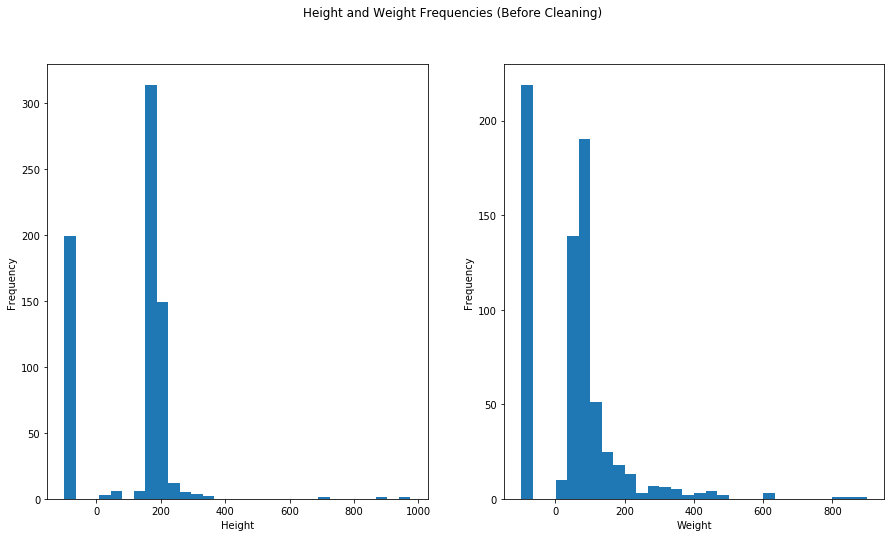

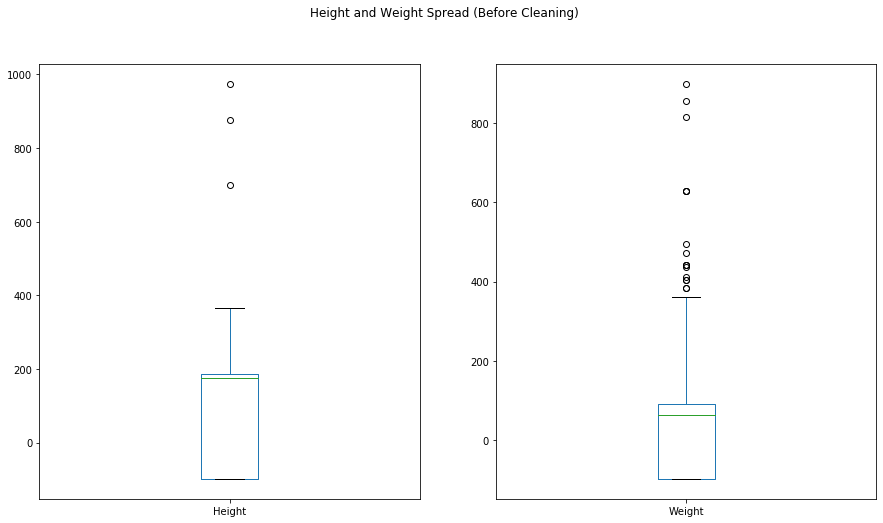

In [20]:
# A bit of analysis of numerical data before cleaning to see how cleaning affects.
fig, axes = plt.subplots(1,2)
fig.suptitle('Height and Weight Frequencies (Before Cleaning)')
ax1 = heroes_df['Height'].plot.hist(bins = 30, figsize=(15, 8), ax=axes[0])
ax1.set_xlabel('Height')
ax2 = heroes_df['Weight'].plot.hist(bins = 30, figsize=(15, 8), ax=axes[1])
ax2.set_xlabel('Weight')

fig2, bxes = plt.subplots(1,2)
fig2.suptitle('Height and Weight Spread (Before Cleaning)')
bx1 = heroes_df['Height'].plot.box(figsize=(15, 8), ax=bxes[0])
bx2 = heroes_df['Weight'].plot.box(figsize=(15, 8), ax=bxes[1])

In [21]:
# heroes_df.loc[heroes_df['Height']==-99, 'Height'] = 183
# heroes_df.loc[heroes_df['Weight']==-99, 'Weight'] = heroes_df['Weight'].median()

In [22]:
# display(heroes_df.describe())

# fig, cxes = plt.subplots(1,2)
# fig.suptitle('Height and Weight Frequencies (After Cleaning)')
# cx1 = heroes_df['Height'].plot.hist(bins = 30, figsize=(15, 8), ax=cxes[0])
# cx1.set_xlabel('Height')
# cx2 = heroes_df['Weight'].plot.hist(bins = 30, figsize=(15, 8), ax=cxes[1])
# cx2.set_xlabel('Weight')

# fig2, dxes = plt.subplots(1,2)
# fig2.suptitle('Height and Weight Spread (After Cleaning)')
# dx1 = heroes_df['Height'].plot.box(figsize=(15, 8), ax=dxes[0])
# dx2 = heroes_df['Weight'].plot.box(figsize=(15, 8), ax=dxes[1])

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [28]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [37]:
heroes_and_powers_df = heroes_df.set_index('name').join(powers_df.set_index('name'), how='inner')

In [39]:
display(heroes_and_powers_df.info())
heroes_and_powers_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, A-Bomb to Zoom
Columns: 175 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(6)
memory usage: 148.0+ KB


None

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [42]:
male_heroes_df = heroes_df.loc[heroes_df['Gender']=='Male']
female_heroes_df = heroes_df.loc[heroes_df['Gender']=='Female']
display(male_heroes_df.info())
display(male_heroes_df.head())
display(female_heroes_df.info())
display(female_heroes_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 702
Data columns (total 9 columns):
name          490 non-null object
Gender        490 non-null object
Eye color     490 non-null object
Race          490 non-null object
Hair color    490 non-null object
Height        490 non-null float64
Publisher     490 non-null object
Alignment     490 non-null object
Weight        490 non-null float64
dtypes: float64(2), object(7)
memory usage: 38.3+ KB


None

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 8 to 701
Data columns (total 9 columns):
name          196 non-null object
Gender        196 non-null object
Eye color     196 non-null object
Race          196 non-null object
Hair color    196 non-null object
Height        196 non-null float64
Publisher     196 non-null object
Alignment     196 non-null object
Weight        196 non-null float64
dtypes: float64(2), object(7)
memory usage: 15.3+ KB


None

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,good,61.0
23,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,good,57.0
24,Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,good,54.0
25,Angela,Female,Uncategorized,-,Uncategorized,-99.0,Image Comics,bad,-99.0
37,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,good,63.0


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [63]:
def show_distplot(dataframe, gender, column_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)
    ax = sns.distplot(dataframe.loc[dataframe['Gender']==gender.title()][column_name], ax = ax)
    ax.set_title(gender + ' ' + column_name)
    return ax

Mean: 108.95102040816326
Median: 180.0


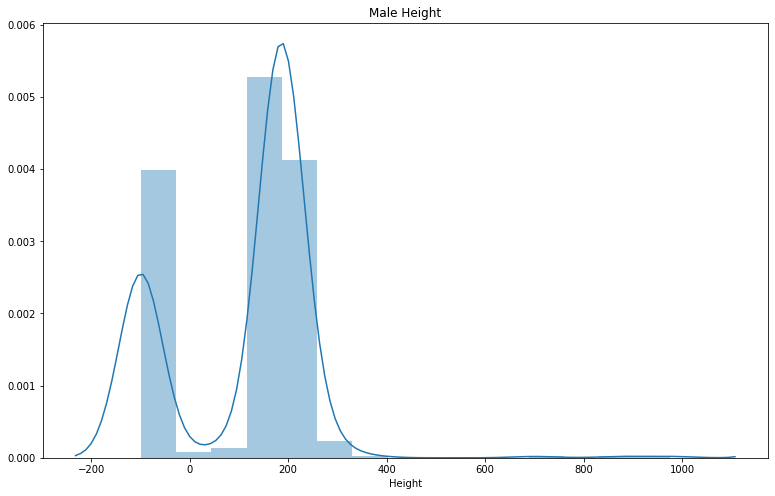

In [69]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')
print('Mean: {}'.format(male_heroes_df.Height.mean()))
print('Median: {}'.format(male_heroes_df.Height.median()))

Mean: 53.53877551020408
Median: 79.0


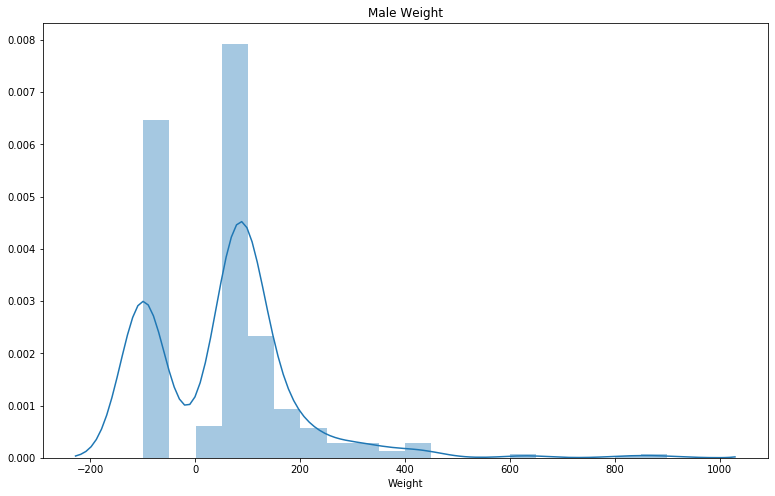

In [70]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')
print('Mean: {}'.format(male_heroes_df.Weight.mean()))
print('Median: {}'.format(male_heroes_df.Weight.median()))

Mean: 97.99234693877551
Median: 168.0


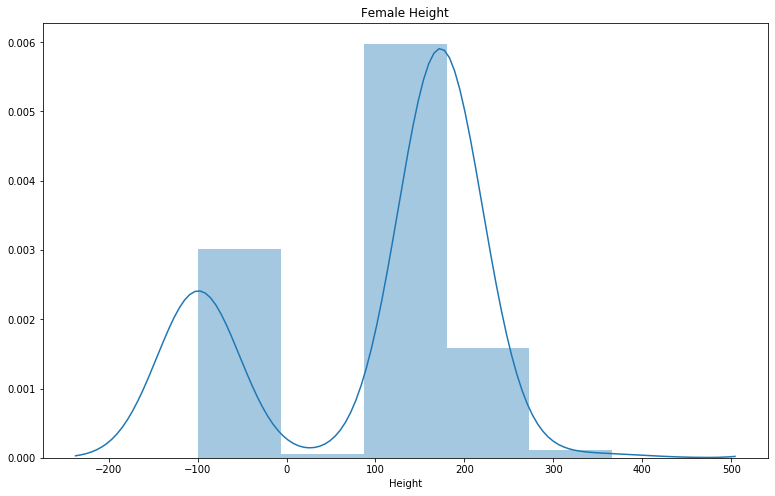

In [71]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')
print('Mean: {}'.format(female_heroes_df.Height.mean()))
print('Median: {}'.format(female_heroes_df.Height.median()))

Mean: 27.433673469387756
Median: 54.0


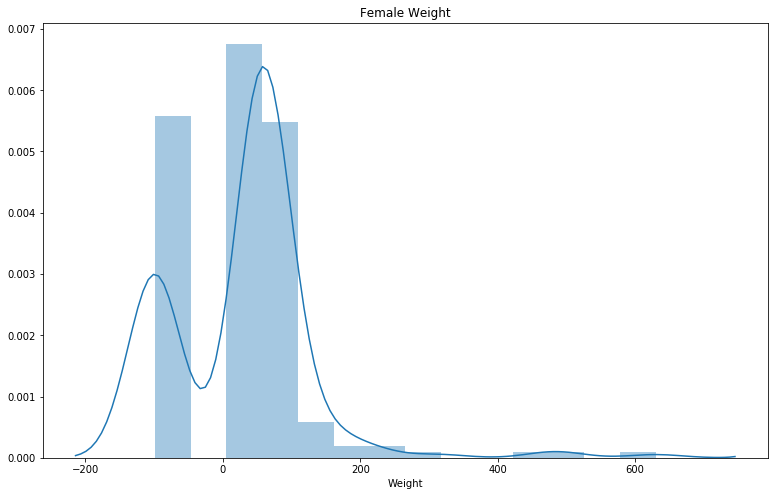

In [72]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')
print('Mean: {}'.format(female_heroes_df.Weight.mean()))
print('Median: {}'.format(female_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [73]:
# It seems to be that the placeholder value, -99, is strongly affecting mean, pulling it downward.
# Hence the mean's being much lower than the median for all of the above values. 
# Further, all data above appear to be bimodal, with a first (artificial) peak created by the placeholder
# and a second peak containing the true center of the data.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [115]:
heroes_and_powers_df.iloc[:, 8:].sum().sort_values(ascending=False)[:10]

Super Strength         343
Stamina                279
Durability             247
Super Speed            237
Agility                231
Flight                 199
Accelerated Healing    171
Reflexes               161
Intelligence           150
Energy Blasts          141
dtype: int64

In [113]:
marvel_df = heroes_and_powers_df.loc[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
marvel_df.iloc[:, 8:].sum().sort_values(ascending=False)[:10]

Super Strength         195
Durability             146
Stamina                145
Super Speed            129
Agility                119
Flight                 104
Accelerated Healing     93
Reflexes                92
Energy Blasts           84
Longevity               59
dtype: int64

In [114]:
dc_df = heroes_and_powers_df.loc[heroes_and_powers_df['Publisher'] == 'DC Comics']
dc_df.iloc[:, 8:].sum().sort_values(ascending=False)[:10]

Super Strength         102
Stamina                 83
Flight                  82
Super Speed             75
Agility                 68
Durability              67
Intelligence            62
Accelerated Healing     50
Stealth                 43
Invulnerability         43
dtype: int64

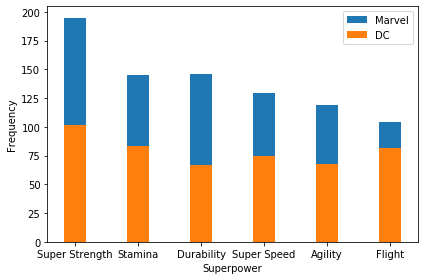

In [127]:
a=['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'Flight']
x=np.arange(len(a))
# y=list(heroes_and_powers_df.iloc[:, 8:].sum().sort_values(ascending=False)[:5])

fig, ax = plt.subplots()
rect1 = ax.bar(x, [195, 145, 146, 129, 119, 104], width=.35, label="Marvel", align='center')
rect2 = ax.bar(x, [102, 83, 67, 75, 68, 82], width=.35, label="DC", align='center')
ax.set_xlabel('Superpower')
ax.set_ylabel('Frequency')
ax.set_xticks(x)
ax.set_xticklabels(a)
ax.legend()
fig.tight_layout()
plt.show()

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data